## Implementation

# Data Understanding



Import Libraries
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import heapq
import matplotlib.pyplot as plt
import plotly.express as  px
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


Reading data 

In [2]:
data = pd.read_csv("Data.csv",nrows=114)
data.head()

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score,Top_1,Top_2,Top_3
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,2.0,4.0,5.0,...,7.0,7.0,7.0,6.0,7.0,5.0,Green,10,7,13
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,8.0,7.0,8.0,6.0,9.0,Blue,6,7,13
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,5.0,7.0,7.0,9.0,6.0,7.0,Green,1,5,7
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,7.0,7.0,8.0,7.5,6.5,9.0,Blue,19,16,13
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,7.0,6.0,8.0,NaN,NaN,Green,7,9,13


In [3]:
data.dtypes

Id                     int64
Name                  object
Gender                object
Field                 object
Occupation            object
Age                    int64
Openness             float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Interface_1          float64
Interface_2          float64
Interface_3          float64
Interface_4          float64
Interface_5          float64
Interface_6          float64
Interface_7          float64
Interface_8          float64
Interface_9          float64
Interface_10         float64
Interface_11         float64
Interface_12         float64
Interface_13         float64
Interface_14         float64
Interface_15         float64
Interface_16         float64
Interface_17         float64
Interface_18         float64
Interface_19         float64
Test_Score            object
Top_1                  int64
Top_2                  int64
Top_3                  int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 114 non-null    int64  
 1   Name               114 non-null    object 
 2   Gender             114 non-null    object 
 3   Field              114 non-null    object 
 4   Occupation         114 non-null    object 
 5   Age                114 non-null    int64  
 6   Openness           114 non-null    float64
 7   Extraversion       114 non-null    float64
 8   Agreeableness      114 non-null    float64
 9   Conscientiousness  114 non-null    float64
 10  Neuroticism        114 non-null    float64
 11  Interface_1        114 non-null    float64
 12  Interface_2        114 non-null    float64
 13  Interface_3        114 non-null    float64
 14  Interface_4        114 non-null    float64
 15  Interface_5        114 non-null    float64
 16  Interface_6        114 non

In [5]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.000000
Name                 0.000000
Gender               0.000000
Field                0.000000
Occupation           0.000000
Age                  0.000000
Openness             0.000000
Extraversion         0.000000
Agreeableness        0.000000
Conscientiousness    0.000000
Neuroticism          0.000000
Interface_1          0.000000
Interface_2          0.000000
Interface_3          0.000000
Interface_4          0.000000
Interface_5          0.000000
Interface_6          0.000000
Interface_7          0.000000
Interface_8          0.000000
Interface_9          0.000000
Interface_10         0.000000
Interface_11         0.000000
Interface_12         0.000000
Interface_13         0.000000
Interface_14         0.000000
Interface_15         0.000000
Interface_16         0.000000
Interface_17         0.000000
Interface_18         6.140351
Interface_19         6.140351
Test_Score           0.000000
Top_1                0.000000
Top_2                0.000000
Top_3     

Fill missing values

In [6]:
data['Interface_18'].fillna(value=data['Interface_18'].mean(), inplace=True)

In [7]:
data['Interface_19'].fillna(value=data['Interface_19'].mean(), inplace=True)


In [8]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.0
Name                 0.0
Gender               0.0
Field                0.0
Occupation           0.0
Age                  0.0
Openness             0.0
Extraversion         0.0
Agreeableness        0.0
Conscientiousness    0.0
Neuroticism          0.0
Interface_1          0.0
Interface_2          0.0
Interface_3          0.0
Interface_4          0.0
Interface_5          0.0
Interface_6          0.0
Interface_7          0.0
Interface_8          0.0
Interface_9          0.0
Interface_10         0.0
Interface_11         0.0
Interface_12         0.0
Interface_13         0.0
Interface_14         0.0
Interface_15         0.0
Interface_16         0.0
Interface_17         0.0
Interface_18         0.0
Interface_19         0.0
Test_Score           0.0
Top_1                0.0
Top_2                0.0
Top_3                0.0
dtype: float64

The values of test_score


In [9]:
data['Test_Score'] .unique()

array(['Green', 'Blue', 'Gold', 'Orange'], dtype=object)

In [10]:
data.describe()


,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,...,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Top_1,Top_2,Top_3
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,...,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,57.500000,21.947368,4.052632,3.342105,3.552632,2.609649,3.399123,6.938596,6.190351,6.117544,...,7.495614,6.583333,6.600877,7.162281,7.958772,6.267290,6.207477,9.578947,10.692982,10.535088
std,33.052988,5.664424,0.831803,1.219886,0.875852,1.393345,1.205041,1.697396,1.931022,1.973463,...,1.899762,2.213111,2.254965,1.646256,1.836205,2.070901,2.015063,4.569802,5.318405,5.409235
min,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,2.300000,1.000000,1.000000,1.000000,1.800000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,29.250000,20.250000,3.625000,2.625000,3.000000,1.000000,3.000000,6.000000,5.000000,5.000000,...,7.000000,5.000000,6.000000,6.000000,7.000000,5.000000,5.000000,7.000000,7.000000,7.000000
50%,57.500000,21.000000,4.000000,3.000000,4.000000,2.000000,4.000000,7.000000,6.000000,6.000000,...,8.000000,7.000000,7.000000,7.000000,8.000000,6.267290,6.353738,10.000000,11.000000,10.000000
75%,85.750000,21.000000,5.000000,4.000000,4.000000,4.000000,4.000000,8.000000,7.750000,7.000000,...,9.000000,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,13.000000,16.000000,16.000000
max,114.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.000000,19.000000,19.000000


In [11]:
data.value_counts('Test_Score')

Test_Score
Gold      34
Blue      32
Orange    28
Green     20
dtype: int64

Some visualization


The gold type is the highest type across other

<AxesSubplot:xlabel='Test_Score', ylabel='Count'>

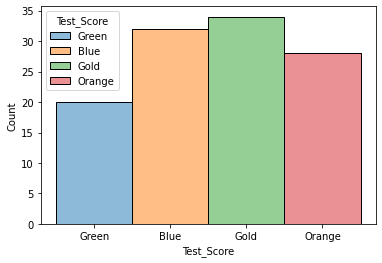

In [12]:
sns.histplot(x='Test_Score', hue='Test_Score', data=data)


The females were more than males

<AxesSubplot:xlabel='Gender', ylabel='Count'>

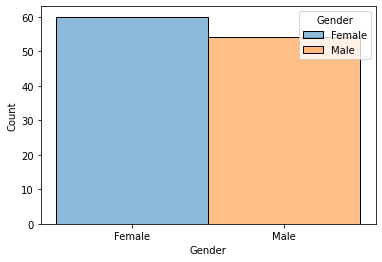

In [13]:
sns.histplot(x='Gender', hue='Gender', data=data)


<AxesSubplot:xlabel='Age', ylabel='Count'>

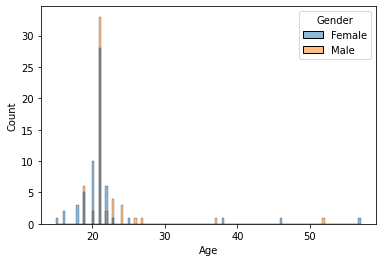

In [14]:
sns.histplot(x='Age', hue='Gender', data=data)


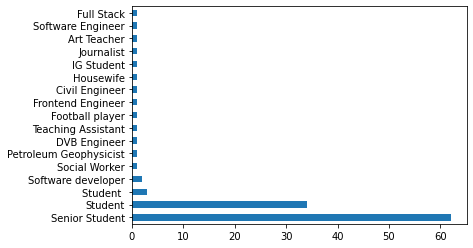

In [15]:
data.Occupation.value_counts().plot.barh()
plt.show()

The top 3 interfaces

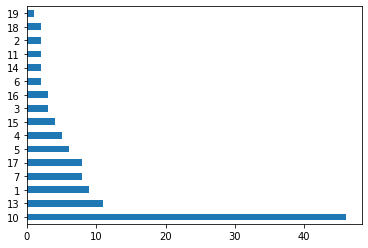

In [16]:
data.Top_1.value_counts().plot.barh()
plt.show()


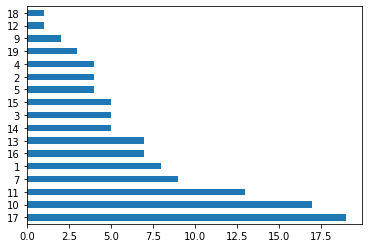

In [17]:
data.Top_2.value_counts().plot.barh()
plt.show()


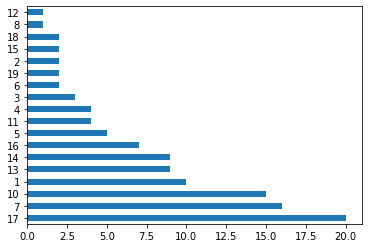

In [18]:
data.Top_3.value_counts().plot.barh()
plt.show()


# Statistical analysis

Get correleation and round value by 2

In [19]:
corr = data.corr().round(2)
corr.style.background_gradient(cmap='Pastel1')

,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Top_1,Top_2,Top_3
Id,1.000000,-0.120000,0.070000,-0.050000,0.070000,-0.180000,0.100000,0.020000,0.010000,0.000000,0.100000,-0.020000,-0.040000,-0.010000,0.060000,0.020000,0.190000,-0.010000,0.030000,0.100000,-0.140000,-0.120000,-0.020000,0.070000,0.080000,0.050000,0.060000,-0.010000,-0.090000
Age,-0.120000,1.000000,-0.010000,0.190000,0.190000,0.210000,0.020000,0.060000,0.040000,0.010000,0.130000,0.020000,0.100000,-0.010000,0.040000,0.040000,-0.100000,-0.020000,0.010000,0.020000,0.160000,0.170000,0.070000,-0.050000,0.120000,0.040000,0.020000,0.080000,0.030000
Openness,0.070000,-0.010000,1.000000,0.280000,0.080000,0.150000,0.020000,0.030000,0.050000,0.110000,0.100000,0.230000,0.100000,0.080000,0.110000,-0.020000,0.190000,0.040000,0.100000,0.180000,0.000000,-0.050000,0.160000,0.060000,0.070000,0.010000,0.120000,-0.170000,-0.080000
Extraversion,-0.050000,0.190000,0.280000,1.000000,0.150000,0.120000,-0.050000,0.010000,0.190000,0.110000,0.250000,0.120000,0.110000,0.010000,0.020000,0.050000,0.010000,0.110000,0.070000,0.030000,0.090000,0.050000,0.190000,-0.070000,0.160000,-0.080000,-0.050000,-0.030000,0.030000
Agreeableness,0.070000,0.190000,0.080000,0.150000,1.000000,0.060000,0.150000,0.060000,0.090000,0.030000,0.040000,0.050000,-0.030000,-0.090000,-0.030000,0.060000,-0.190000,0.010000,0.010000,-0.060000,-0.020000,0.000000,0.060000,-0.050000,0.060000,-0.020000,-0.040000,-0.120000,-0.020000
Conscientiousness,-0.180000,0.210000,0.150000,0.120000,0.060000,1.000000,0.030000,0.180000,0.190000,0.090000,0.030000,0.060000,0.140000,0.030000,0.040000,0.140000,-0.030000,0.210000,0.020000,0.160000,0.190000,0.110000,0.100000,0.150000,-0.010000,0.000000,-0.040000,-0.000000,0.100000
Neuroticism,0.100000,0.020000,0.020000,-0.050000,0.150000,0.030000,1.000000,0.240000,0.150000,0.250000,0.170000,0.160000,0.060000,0.060000,0.010000,0.100000,0.250000,0.120000,0.190000,0.160000,-0.040000,-0.010000,0.020000,0.040000,0.100000,0.080000,-0.160000,-0.200000,0.010000
Interface_1,0.020000,0.060000,0.030000,0.010000,0.060000,0.180000,0.240000,1.000000,0.700000,0.750000,0.400000,0.480000,0.230000,0.130000,0.100000,0.120000,0.180000,0.550000,0.410000,0.240000,0.200000,0.300000,0.250000,0.350000,0.280000,0.250000,-0.310000,-0.340000,-0.200000
Interface_2,0.010000,0.040000,0.050000,0.190000,0.090000,0.190000,0.150000,0.700000,1.000000,0.720000,0.390000,0.430000,0.310000,0.290000,0.240000,0.270000,0.200000,0.400000,0.330000,0.250000,0.260000,0.330000,0.250000,0.300000,0.350000,0.200000,-0.370000,-0.350000,-0.100000
Interface_3,0.000000,0.010000,0.110000,0.110000,0.030000,0.090000,0.250000,0.750000,0.720000,1.000000,0.300000,0.390000,0.310000,0.210000,0.120000,0.140000,0.250000,0.460000,0.380000,0.230000,0.170000,0.260000,0.220000,0.330000,0.300000,0.180000,-0.300000,-0.280000,-0.220000


# get dynamic the highest and lowest interfaces along all the personalities

Select 19 interfaces columns

In [20]:
data_1= data[data.columns[11:31]]

data_1

,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score
0,6.0,6.0,5.0,5.0,6.0,4.0,7.0,6.0,6.0,8.0,6.0,7.0,8.0,7.0,7.0,7.0,6.0,7.00000,5.000000,Green
1,8.0,7.0,7.0,6.0,8.0,9.0,9.0,5.0,3.0,8.0,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.00000,9.000000,Blue
2,9.0,8.5,7.0,6.0,9.0,8.0,9.0,6.0,5.0,9.0,8.0,6.0,8.0,5.0,7.0,7.0,9.0,6.00000,7.000000,Green
3,6.0,5.5,5.0,6.0,6.5,5.0,7.0,5.0,4.0,5.5,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.50000,9.000000,Blue
4,5.0,3.0,4.0,4.0,7.0,7.0,8.0,5.0,8.0,7.0,6.0,4.0,8.0,6.0,7.0,6.0,8.0,6.26729,6.207477,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,6.0,5.0,4.0,7.0,8.0,8.0,8.0,7.5,8.0,9.0,7.0,5.0,7.0,7.0,6.0,8.0,9.0,6.00000,7.000000,Gold
110,4.0,4.0,3.0,5.0,5.0,2.0,7.0,1.0,2.0,8.0,3.0,2.0,7.0,5.0,6.0,5.0,8.0,4.00000,4.000000,Gold
111,4.0,4.0,3.0,5.0,5.0,2.0,7.0,1.0,2.0,8.0,3.0,2.0,7.0,5.0,6.0,5.0,8.0,4.00000,4.000000,Green
112,8.0,9.0,7.0,5.0,8.0,6.0,7.0,6.0,5.0,10.0,10.0,7.0,9.0,8.0,8.0,9.0,10.0,5.00000,8.000000,Gold


For each type of calculate the means then select the highest and lowest  4 by heapq  

In [21]:
means_Green = np.mean(data_1[data_1['Test_Score']=='Green'], axis=0)  
green_Array = []
green_Array.extend(means_Green)
highest_green = heapq.nlargest(4, means_Green)
lowest_green = heapq.nsmallest(4, means_Green)


means_Blue = np.mean(data_1[data_1['Test_Score']=='Blue'], axis=0)  
blue_Array = []
blue_Array.extend(means_Blue)
highest_blue = heapq.nlargest(4, means_Blue)
lowest_blue = heapq.nsmallest(4, means_Blue)



means_Gold= np.mean(data_1[data_1['Test_Score']=='Gold'], axis=0)  
gold_Array = []
gold_Array.extend(means_Gold)
highest_gold = heapq.nlargest(4, means_Gold)
lowest_gold = heapq.nsmallest(4, means_Gold)



means_Orange = np.mean(data_1[data_1['Test_Score']=='Orange'], axis=0)  
orange_Array = []
orange_Array.extend(means_Orange)
highest_orange = heapq.nlargest(4, means_Orange)
lowest_orange = heapq.nsmallest(4, means_Orange)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


get the index of interfaces that were corresponding to the highest and lowest 4

In [22]:
def get_index_4(array1,array2,full_array):
    high1,high2,high3,high4=array1
    low1,low2,low3,low4=array2
    index_high1=full_array.index(high1)
    index_high2=full_array.index(high2)
    index_high3=full_array.index(high3)
    index_high4=full_array.index(high4)
    index_low1=full_array.index(low1)
    index_low2=full_array.index(low2)
    index_low3=full_array.index(low3)
    index_low4=full_array.index(low4)
    return index_high1,index_high2,index_high3,index_high4,index_low1,index_low2,index_low3,index_low4

In [23]:
Green_values=get_index_4(highest_green,lowest_green,green_Array)
Blue_values=get_index_4(highest_blue,lowest_blue,blue_Array)
Gold_values=get_index_4(highest_gold,lowest_gold,gold_Array)
Orange_values=get_index_4(highest_orange,lowest_orange,orange_Array)
Orange_values


(9, 16, 10, 0, 8, 7, 11, 17)

In [24]:
selected_green = [*Green_values]
selected_blue = [*Blue_values]
selected_gold = [*Gold_values]
selected_orange = [*Orange_values]

get union of them without duplicates columns to then create dataframe by those interfaces that were resulting by heapq

In [25]:
def Union(lst1, lst2, lst3 , lst4):
    final_list = list(set(lst1) | set(lst2) | set(lst3)  | set(lst4))
    return final_list
selected_factors=Union(selected_green,selected_blue,selected_gold,selected_orange) 

In [26]:
All_factors = [*selected_factors]
selected_interfaces = data_1.iloc[:, All_factors]


In [27]:
Interfaces=selected_interfaces

Convert columns into 1 if the value greater than or equal 6 and 0 if it was smaller

In [28]:
def convert_values(column):
    return column.apply(lambda x: 1 if x >= 6 else 0)

for column in Interfaces.columns:
    Interfaces[column] = convert_values(Interfaces[column])


C:\Users\HP\AppData\Local\Temp\ipykernel_14808\3814709719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Interfaces[column] = convert_values(Interfaces[column])


add test score values to the dataframe

In [29]:
Interfaces['Test_Score']=data_1.iloc[:,-1]


C:\Users\HP\AppData\Local\Temp\ipykernel_14808\2089764425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Interfaces['Test_Score']=data_1.iloc[:,-1]


# Machine learning using All interfaces

All features with traits added to the models to prdict personality

In [30]:
New=data[data.columns[6:31]]
New

,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,...,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score
0,3.0,2.0,4.0,5.0,4.0,6.0,6.0,5.0,5.0,6.0,...,6.0,7.0,8.0,7.0,7.0,7.0,6.0,7.00000,5.000000,Green
1,4.0,5.0,3.0,2.0,1.0,8.0,7.0,7.0,6.0,8.0,...,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.00000,9.000000,Blue
2,5.0,4.0,3.0,3.0,3.0,9.0,8.5,7.0,6.0,9.0,...,8.0,6.0,8.0,5.0,7.0,7.0,9.0,6.00000,7.000000,Green
3,4.0,3.0,5.0,5.0,1.0,6.0,5.5,5.0,6.0,6.5,...,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.50000,9.000000,Blue
4,4.0,2.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,7.0,...,6.0,4.0,8.0,6.0,7.0,6.0,8.0,6.26729,6.207477,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,3.0,3.0,4.0,2.0,3.0,6.0,5.0,4.0,7.0,8.0,...,7.0,5.0,7.0,7.0,6.0,8.0,9.0,6.00000,7.000000,Gold
110,3.0,1.0,3.0,1.0,3.0,4.0,4.0,3.0,5.0,5.0,...,3.0,2.0,7.0,5.0,6.0,5.0,8.0,4.00000,4.000000,Gold
111,3.0,1.0,3.0,1.0,3.0,4.0,4.0,3.0,5.0,5.0,...,3.0,2.0,7.0,5.0,6.0,5.0,8.0,4.00000,4.000000,Green
112,5.0,4.0,4.0,2.0,4.0,8.0,9.0,7.0,5.0,8.0,...,10.0,7.0,9.0,8.0,8.0,9.0,10.0,5.00000,8.000000,Gold


In [31]:
New=data[data.columns[6:31]]
# convert test score from string into 0,1,2,3
New['Test_Score'] = pd.factorize(New['Test_Score'])[0]



C:\Users\HP\AppData\Local\Temp\ipykernel_14808\2997411232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New['Test_Score'] = pd.factorize(New['Test_Score'])[0]


In [32]:
y = New['Test_Score']
y
x = New.drop(['Test_Score'],axis = 1)
x
Y= y.values
X=x.values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)


In [33]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100


26.08695652173913

In [34]:
knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
y_pred_KNN= knn_model.predict(x_test)
accuracy_score(y_test, y_pred_KNN)*100

30.434782608695656

In [35]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test,y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


43.47826086956522

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


21.73913043478261
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.09      0.17        11
           2       0.18      0.75      0.29         4
           3       0.20      0.33      0.25         3

    accuracy                           0.22        23
   macro avg       0.34      0.29      0.18        23
weighted avg       0.54      0.22      0.16        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


21.73913043478261
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.67      0.18      0.29        11
           2       0.14      0.50      0.22         4
           3       0.20      0.33      0.25         3

    accuracy                           0.22        23
   macro avg       0.25      0.25      0.19        23
weighted avg       0.37      0.22      0.21        23



# highest and lowest all data without filtering anything

convert the types into arrays of 1s and 0s 

In [38]:
y=np.full([len(Interfaces['Test_Score']),4],[0,0,0,0])
y1=np.array(y)
for Classes in range(len(Interfaces['Test_Score'])):
    if Interfaces['Test_Score'][Classes]=='Green':
        y1[Classes][0]=1
    elif Interfaces['Test_Score'][Classes] == 'Blue':
        y1[Classes][1]=1
    elif Interfaces['Test_Score'][Classes] == 'Gold':
        y1[Classes][2]=1    
    else:
        y1[Classes][3]=1


In [39]:
data_2= data[data.columns[11:31]]
data_2

,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score
0,6.0,6.0,5.0,5.0,6.0,4.0,7.0,6.0,6.0,8.0,6.0,7.0,8.0,7.0,7.0,7.0,6.0,7.00000,5.000000,Green
1,8.0,7.0,7.0,6.0,8.0,9.0,9.0,5.0,3.0,8.0,8.0,7.0,9.0,8.0,8.0,7.0,8.0,6.00000,9.000000,Blue
2,9.0,8.5,7.0,6.0,9.0,8.0,9.0,6.0,5.0,9.0,8.0,6.0,8.0,5.0,7.0,7.0,9.0,6.00000,7.000000,Green
3,6.0,5.5,5.0,6.0,6.5,5.0,7.0,5.0,4.0,5.5,6.0,6.5,7.5,7.0,7.0,8.0,7.5,6.50000,9.000000,Blue
4,5.0,3.0,4.0,4.0,7.0,7.0,8.0,5.0,8.0,7.0,6.0,4.0,8.0,6.0,7.0,6.0,8.0,6.26729,6.207477,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,6.0,5.0,4.0,7.0,8.0,8.0,8.0,7.5,8.0,9.0,7.0,5.0,7.0,7.0,6.0,8.0,9.0,6.00000,7.000000,Gold
110,4.0,4.0,3.0,5.0,5.0,2.0,7.0,1.0,2.0,8.0,3.0,2.0,7.0,5.0,6.0,5.0,8.0,4.00000,4.000000,Gold
111,4.0,4.0,3.0,5.0,5.0,2.0,7.0,1.0,2.0,8.0,3.0,2.0,7.0,5.0,6.0,5.0,8.0,4.00000,4.000000,Green
112,8.0,9.0,7.0,5.0,8.0,6.0,7.0,6.0,5.0,10.0,10.0,7.0,9.0,8.0,8.0,9.0,10.0,5.00000,8.000000,Gold


get means for all interfaces

In [40]:
means = np.mean(data_2[data_2.columns], axis=0)  
Array = []
Array.extend(means)
highest= heapq.nlargest(4, means)
lowest= heapq.nsmallest(4, means)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


call function on highest and lowest 4 interfaces

In [41]:
values=get_index_4(highest,lowest,Array)
selected = [*values]
selected

[9, 16, 12, 15, 8, 7, 5, 11]

In [42]:
X_data = [*selected]
Top_data = data_2.iloc[:, X_data]
Top_data

,Interface_10,Interface_17,Interface_13,Interface_16,Interface_9,Interface_8,Interface_6,Interface_12
0,8.0,6.0,8.0,7.0,6.0,6.0,4.0,7.0
1,8.0,8.0,9.0,7.0,3.0,5.0,9.0,7.0
2,9.0,9.0,8.0,7.0,5.0,6.0,8.0,6.0
3,5.5,7.5,7.5,8.0,4.0,5.0,5.0,6.5
4,7.0,8.0,8.0,6.0,8.0,5.0,7.0,4.0
...,...,...,...,...,...,...,...,...
109,9.0,9.0,7.0,8.0,8.0,7.5,8.0,5.0
110,8.0,8.0,7.0,5.0,2.0,1.0,2.0,2.0
111,8.0,8.0,7.0,5.0,2.0,1.0,2.0,2.0
112,10.0,10.0,9.0,9.0,5.0,6.0,6.0,7.0


Convert columns

In [43]:

for column in Top_data.columns:
    Top_data[column] = convert_values(Top_data[column])


C:\Users\HP\AppData\Local\Temp\ipykernel_14808\657124169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_data[column] = convert_values(Top_data[column])


In [44]:
Top=Top_data
Top

,Interface_10,Interface_17,Interface_13,Interface_16,Interface_9,Interface_8,Interface_6,Interface_12
0,1,1,1,1,1,1,0,1
1,1,1,1,1,0,0,1,1
2,1,1,1,1,0,1,1,1
3,0,1,1,1,0,0,0,1
4,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
109,1,1,1,1,1,1,1,0
110,1,1,1,0,0,0,0,0
111,1,1,1,0,0,0,0,0
112,1,1,1,1,0,1,1,1


In [45]:
Top['Test_Score']=data_2.iloc[:,-1]

C:\Users\HP\AppData\Local\Temp\ipykernel_14808\99863896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top['Test_Score']=data_2.iloc[:,-1]


Machine larning models

In [46]:
x = Top[Top.columns[:8]].values
Y= y1
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

37.362637362637365
acc of KNN %  17.391304347826086
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.44      0.36      0.40        11
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

   micro avg       0.21      0.17      0.19        23
   macro avg       0.11      0.09      0.10        23
weighted avg       0.21      0.17      0.19        23
 samples avg       0.17      0.17      0.17        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


0.0
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

   micro avg       0.00      0.00      0.00        23
   macro avg       0.00      0.00      0.00        23
weighted avg       0.00      0.00      0.00        23
 samples avg       0.00      0.00      0.00        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Array of personality in 1s and 0s

convert test score to array of arrays of 1s and 0s and entered them to machine learning models

In [48]:
y=np.full([len(Interfaces['Test_Score']),4],[0,0,0,0])
y1=np.array(y)
for Classes in range(len(Interfaces['Test_Score'])):
    if Interfaces['Test_Score'][Classes]=='Green':
        y1[Classes][0]=1
    elif Interfaces['Test_Score'][Classes] == 'Blue':
        y1[Classes][1]=1
    elif Interfaces['Test_Score'][Classes] == 'Gold':
        y1[Classes][2]=1    
    else:
        y1[Classes][3]=1


In [49]:
y=y1
x=Interfaces[Interfaces.columns[:14]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)

y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

41.75824175824176
acc of KNN %  8.695652173913043
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.09      0.14        11
           2       0.12      0.25      0.17         4
           3       0.00      0.00      0.00         3

   micro avg       0.13      0.09      0.11        23
   macro avg       0.11      0.09      0.08        23
weighted avg       0.18      0.09      0.10        23
 samples avg       0.09      0.09      0.09        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


8.695652173913043
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.09      0.14        11
           2       0.14      0.25      0.18         4
           3       0.00      0.00      0.00         3

   micro avg       0.15      0.09      0.11        23
   macro avg       0.12      0.09      0.08        23
weighted avg       0.18      0.09      0.10        23
 samples avg       0.09      0.09      0.09        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
# svc=svm.SVC()
# model_svc= svc.fit(x_train, y_train)
# y_pred_svc= model_svc.predict(x_test)
# print(accuracy_score(y_test, y_pred_svc)*100)
# print("F-score",classification_report(y_test, y_pred_svc))


# GReen

Convert column test score from actual values into 4 columns by dummies and drop other type columns

In [52]:
dummy_df = pd.get_dummies(Interfaces, columns=['Test_Score'])

In [53]:
Green_data=dummy_df

In [54]:
Green_data = Green_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Orange"],axis=1)


In [55]:
y=Green_data['Test_Score_Green'].values
x=Green_data[Green_data.columns[:13]].values

split data into test and train

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [57]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)
print("F-score",classification_report(y_test, y_pred_tree))



65.21739130434783
F-score               precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.00      0.00      0.00         5

    accuracy                           0.65        23
   macro avg       0.38      0.42      0.39        23
weighted avg       0.59      0.65      0.62        23



Machine learning models

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


84.61538461538461
acc of KNN %  78.26086956521739
F-score               precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       0.00      0.00      0.00         5

    accuracy                           0.78        23
   macro avg       0.39      0.50      0.44        23
weighted avg       0.61      0.78      0.69        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [59]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

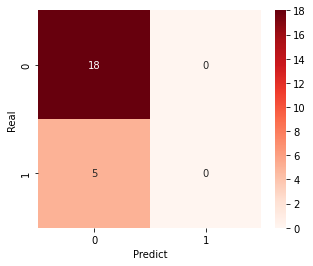

In [60]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [61]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))



F-score               precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       0.00      0.00      0.00         5

    accuracy                           0.74        23
   macro avg       0.39      0.47      0.42        23
weighted avg       0.60      0.74      0.67        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


78.26086956521739
F-score               precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       0.00      0.00      0.00         5

    accuracy                           0.78        23
   macro avg       0.39      0.50      0.44        23
weighted avg       0.61      0.78      0.69        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


73.91304347826086
F-score               precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       0.00      0.00      0.00         5

    accuracy                           0.74        23
   macro avg       0.39      0.47      0.42        23
weighted avg       0.60      0.74      0.67        23



[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

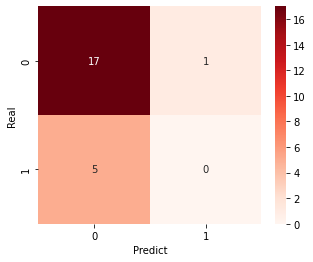

In [64]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

# Blue 

Convert column test score from actual values into 4 columns by dummies and drop other type columns

In [65]:
Blue_data= dummy_df

In [66]:
Blue_data = Blue_data.drop(["Test_Score_Green","Test_Score_Gold","Test_Score_Orange"],axis=1)


split data

In [67]:
y=Blue_data['Test_Score_Blue'].values
x=Blue_data[Blue_data.columns[:13]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


ML models

In [68]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)
print("F-score",classification_report(y_test, y_pred_tree))


52.17391304347826
F-score               precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.50      0.36      0.42        11

    accuracy                           0.52        23
   macro avg       0.52      0.52      0.51        23
weighted avg       0.52      0.52      0.51        23



In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)

y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

82.41758241758241
acc of KNN %  47.82608695652174
F-score               precision    recall  f1-score   support

           0       0.50      0.83      0.62        12
           1       0.33      0.09      0.14        11

    accuracy                           0.48        23
   macro avg       0.42      0.46      0.38        23
weighted avg       0.42      0.48      0.39        23



In [70]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,1
1,1,0
2,0,0
3,0,0
4,0,0
5,1,0
6,1,0
7,0,0
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

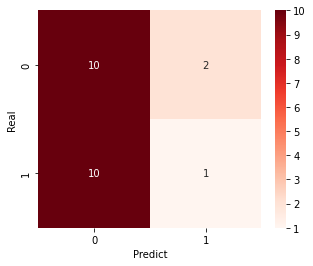

In [71]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [72]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.50      0.75      0.60        12
           1       0.40      0.18      0.25        11

    accuracy                           0.48        23
   macro avg       0.45      0.47      0.43        23
weighted avg       0.45      0.48      0.43        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


52.17391304347826
F-score               precision    recall  f1-score   support

           0       0.52      1.00      0.69        12
           1       0.00      0.00      0.00        11

    accuracy                           0.52        23
   macro avg       0.26      0.50      0.34        23
weighted avg       0.27      0.52      0.36        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


47.82608695652174
F-score               precision    recall  f1-score   support

           0       0.50      0.83      0.62        12
           1       0.33      0.09      0.14        11

    accuracy                           0.48        23
   macro avg       0.42      0.46      0.38        23
weighted avg       0.42      0.48      0.39        23



[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

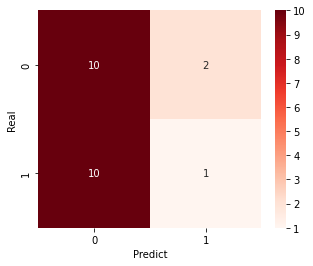

In [75]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

# GOld

Convert column test score from actual values into 4 columns by dummies and drop other type columns

In [76]:
Gold_data= dummy_df

In [77]:
Gold_data = Gold_data.drop(["Test_Score_Blue","Test_Score_Green","Test_Score_Orange"],axis=1)
Gold_data

,Interface_1,Interface_3,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score_Gold
0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0
1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0
3,1,0,0,1,0,0,0,1,1,1,1,1,1,1,0
4,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1
110,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
111,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
112,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1


In [78]:
y=Gold_data['Test_Score_Gold'].values
x=Gold_data[Gold_data.columns[:13]].values
x

array([[1, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

split data

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

ML models

In [80]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)



56.52173913043478


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)
y_pred_KNN= knn_model.predict(x_test)
# print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

75.82417582417582
60.86956521739131
F-score               precision    recall  f1-score   support

           0       0.78      0.74      0.76        19
           1       0.00      0.00      0.00         4

    accuracy                           0.61        23
   macro avg       0.39      0.37      0.38        23
weighted avg       0.64      0.61      0.63        23



In [82]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,1,0
1,0,0
2,0,1
3,1,0
4,0,0
5,0,1
6,0,0
7,1,0
8,0,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

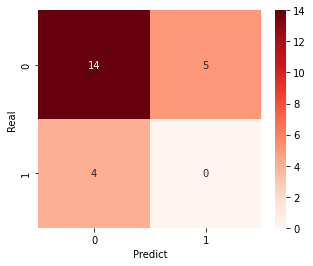

In [83]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [84]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


60.86956521739131

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


78.26086956521739
F-score               precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.00      0.00      0.00         4

    accuracy                           0.78        23
   macro avg       0.41      0.47      0.44        23
weighted avg       0.68      0.78      0.73        23



In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


52.17391304347826
F-score               precision    recall  f1-score   support

           0       0.79      0.58      0.67        19
           1       0.11      0.25      0.15         4

    accuracy                           0.52        23
   macro avg       0.45      0.41      0.41        23
weighted avg       0.67      0.52      0.58        23



[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

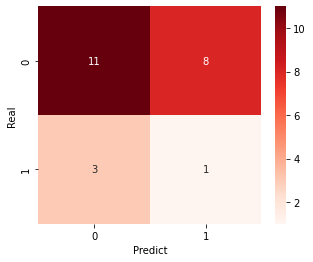

In [87]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

# Orange

Convert column test score from actual values into 4 columns by dummies and drop other type columns

In [88]:
Orange_data= dummy_df

In [89]:
Orange_data = Orange_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Green"],axis=1)
Orange_data

,Interface_1,Interface_3,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_16,Interface_17,Interface_18,Interface_19,Test_Score_Orange
0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0
1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0
2,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0
3,1,0,0,1,0,0,0,1,1,1,1,1,1,1,0
4,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0
110,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
111,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0
112,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0


In [90]:
y=Orange_data['Test_Score_Orange'].values
x=Orange_data[Orange_data.columns[:13]].values

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


In [92]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
accuracy_score(y_test, y_pred_tree)*100

91.30434782608695

split data

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

ML models

In [94]:
knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)

In [95]:
print(knn_model.score(x_train,y_train)*100)
print(knn_model.score(x_test,y_test)*100)

y_pred_KNN = knn_model.predict(x_test)


print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

80.21978021978022
78.26086956521739
acc of KNN %  78.26086956521739
F-score               precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.00      0.00      0.00         3

    accuracy                           0.78        23
   macro avg       0.43      0.45      0.44        23
weighted avg       0.75      0.78      0.76        23



In [96]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,1,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Actual')]

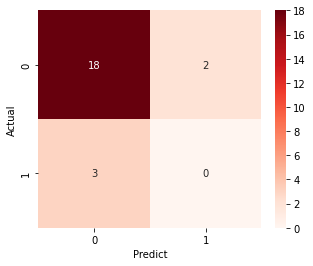

In [97]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Actual")

In [98]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
print(accuracy_score(y_test, y_pred_networks)*100)
print("F-score",classification_report(y_test, y_pred_networks))


86.95652173913044
F-score               precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.50      0.67      0.57         3

    accuracy                           0.87        23
   macro avg       0.72      0.78      0.75        23
weighted avg       0.89      0.87      0.88        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


86.95652173913044
F-score               precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       0.00      0.00      0.00         3

    accuracy                           0.87        23
   macro avg       0.43      0.50      0.47        23
weighted avg       0.76      0.87      0.81        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


82.6086956521739
F-score               precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.00      0.00      0.00         3

    accuracy                           0.83        23
   macro avg       0.43      0.47      0.45        23
weighted avg       0.75      0.83      0.79        23



[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

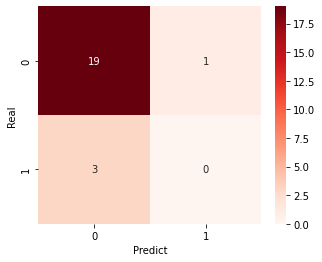

In [101]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

# Vector
 all interfaces in one array 

In [102]:
y=New['Test_Score']
x=Interfaces[Interfaces.columns[:13]].values

In [103]:
Y= y
X=x



ML models

In [104]:
Y= y
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
weights = {0:0.25,1:0.25,2:0.25,3:0.25}
tree=DecisionTreeClassifier(class_weight=weights)
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)
print("F-score",classification_report(y_test, y_pred_tree))


34.78260869565217
F-score               precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.62      0.45      0.53        11
           2       0.10      0.25      0.14         4
           3       0.50      0.33      0.40         3

    accuracy                           0.35        23
   macro avg       0.39      0.31      0.33        23
weighted avg       0.45      0.35      0.38        23



[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

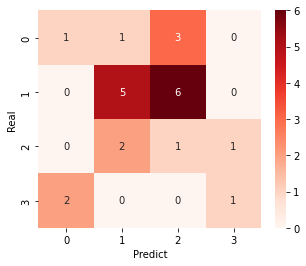

In [105]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [106]:
x = Interfaces[Interfaces.columns[:13]].values
x
Y= y1
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=4, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))



15.384615384615385
acc of KNN %  0.0
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

   micro avg       0.00      0.00      0.00        23
   macro avg       0.00      0.00      0.00        23
weighted avg       0.00      0.00      0.00        23
 samples avg       0.00      0.00      0.00        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
print(mlpc.score(x_train,y_train)*100)

accuracy_score(y_test, y_pred_networks)*100

4.395604395604396


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


4.3478260869565215

In [108]:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
# svc=svm.SVC()
# model_svc= svc.fit(x_train, y_train)
# y_pred_svc= model_svc.predict(x_test)
# print(accuracy_score(y_test, y_pred_svc)*100)
# print("F-score",classification_report(y_test, y_pred_svc))



In [109]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


4.3478260869565215
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.33      0.09      0.14        11
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

   micro avg       0.08      0.04      0.06        23
   macro avg       0.08      0.02      0.04        23
weighted avg       0.16      0.04      0.07        23
 samples avg       0.04      0.04      0.04        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 8 Interfaces to KNN

get means per type and select highest and lowest 3 then get index of them to union them and at the end convert their values to 1s and 0s before entering ML models

In [110]:
means_Green = np.mean(data_1[data_1['Test_Score']=='Green'], axis=0)  
green_Array = []
green_Array.extend(means_Green)
highest_green = heapq.nlargest(3, means_Green)
lowest_green = heapq.nsmallest(3, means_Green)


means_Blue = np.mean(data_1[data_1['Test_Score']=='Blue'], axis=0)  
blue_Array = []
blue_Array.extend(means_Blue)
highest_blue = heapq.nlargest(3, means_Blue)
lowest_blue = heapq.nsmallest(3, means_Blue)



means_Gold= np.mean(data_1[data_1['Test_Score']=='Gold'], axis=0)  
gold_Array = []
gold_Array.extend(means_Gold)
highest_gold = heapq.nlargest(3, means_Gold)
lowest_gold = heapq.nsmallest(3, means_Gold)



means_Orange = np.mean(data_1[data_1['Test_Score']=='Orange'], axis=0)  
orange_Array = []
orange_Array.extend(means_Orange)
highest_orange = heapq.nlargest(3, means_Orange)
lowest_orange = heapq.nsmallest(3, means_Orange)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [111]:
def get_index(array1,array2,full_array):
    high1,high2,high3=array1
    low1,low2,low3=array2
    index_high1=full_array.index(high1)
    index_high2=full_array.index(high2)
    index_high3=full_array.index(high3)
    index_low1=full_array.index(low1)
    index_low2=full_array.index(low2)
    index_low3=full_array.index(low3)
    return index_high1,index_high2,index_high3,index_low1,index_low2,index_low3

In [112]:
Green_values=get_index(highest_green,lowest_green,green_Array)
Blue_values=get_index(highest_blue,lowest_blue,blue_Array)
Gold_values=get_index(highest_gold,lowest_gold,gold_Array)
Orange_values=get_index(highest_orange,lowest_orange,orange_Array)
selected_green = [*Green_values]
selected_blue = [*Blue_values]
selected_gold = [*Gold_values]
selected_orange = [*Orange_values]

In [113]:
def Union(lst1, lst2, lst3 , lst4):
    final_list = list(set(lst1) | set(lst2) | set(lst3)  | set(lst4))
    return final_list
selected_factors=Union(selected_green,selected_blue,selected_gold,selected_orange) 

In [114]:
selected_factors

[5, 7, 8, 9, 10, 11, 12, 16]

In [115]:
All_factors = [*selected_factors]
New_factors = data_1.iloc[:, All_factors]
# New_factors['Test_Score']=data_1.iloc[:,-1]


In [116]:

for column in New_factors.columns:
    New_factors[column] = convert_values(New_factors[column])


C:\Users\HP\AppData\Local\Temp\ipykernel_14808\1415960429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_factors[column] = convert_values(New_factors[column])


In [117]:
Factors=New_factors
Factors

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17
0,0,1,1,1,1,1,1,1
1,1,0,0,1,1,1,1,1
2,1,1,0,1,1,1,1,1
3,0,0,0,0,1,1,1,1
4,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
109,1,1,1,1,1,0,1,1
110,0,0,0,1,0,0,1,1
111,0,0,0,1,0,0,1,1
112,1,1,0,1,1,1,1,1


In [118]:
Factors['Test_Score']=data_1.iloc[:,-1]


C:\Users\HP\AppData\Local\Temp\ipykernel_14808\2639090068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Factors['Test_Score']=data_1.iloc[:,-1]


ML models

In [119]:
x = Factors[Factors.columns[:8]].values
Y= y1
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


34.065934065934066
acc of KNN %  21.73913043478261
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      0.45      0.48        11
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

   micro avg       0.26      0.22      0.24        23
   macro avg       0.12      0.11      0.12        23
weighted avg       0.24      0.22      0.23        23
 samples avg       0.22      0.22      0.22        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [120]:
# from sklearn.metrics import confusion_matrix

# m_c = confusion_matrix(y_test, y_pred_KNN)
# plt.figure(figsize=(5, 4))
# sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [121]:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
# svc=svm.SVC()
# model_svc= svc.fit(x_train, y_train)
# y_pred_svc= model_svc.predict(x_test)
# print(accuracy_score(y_test, y_pred_svc)*100)
# print("F-score",classification_report(y_test, y_pred_svc))


In [122]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


0.0
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

   micro avg       0.00      0.00      0.00        23
   macro avg       0.00      0.00      0.00        23
weighted avg       0.00      0.00      0.00        23
 samples avg       0.00      0.00      0.00        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# highest 3

get highest and lowest 3 for all data 

In [123]:
means_3= np.mean(data_2[data_2.columns], axis=0)  
Array = []
Array.extend(means_3)
highest_3 = heapq.nlargest(3, means_3)
lowest_3 = heapq.nsmallest(3, means_3)
values=get_index(highest_3,lowest_3,Array)
selected_3 = [*values]
selected_3

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


[9, 16, 12, 8, 7, 5]

In [124]:
X_data = [*selected_3]
Top_Data = data_2.iloc[:, X_data]

convert columns

In [125]:
for column in Top_Data.columns:
    Top_Data[column] = convert_values(Top_Data[column])

Top_1=Top_Data
Top_1    

C:\Users\HP\AppData\Local\Temp\ipykernel_14808\2878359513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_Data[column] = convert_values(Top_Data[column])


,Interface_10,Interface_17,Interface_13,Interface_9,Interface_8,Interface_6
0,1,1,1,1,1,0
1,1,1,1,0,0,1
2,1,1,1,0,1,1
3,0,1,1,0,0,0
4,1,1,1,1,0,1
...,...,...,...,...,...,...
109,1,1,1,1,1,1
110,1,1,1,0,0,0
111,1,1,1,0,0,0
112,1,1,1,0,1,1


In [126]:
Top_1['Test_Score']=data_2.iloc[:,-1]

C:\Users\HP\AppData\Local\Temp\ipykernel_14808\3780778541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_1['Test_Score']=data_2.iloc[:,-1]


ML models

In [127]:
x = Top_1[Top_1.columns[:6]].values
Y= y1
X=x
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))

35.16483516483517
acc of KNN %  0.0
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

   micro avg       0.00      0.00      0.00        23
   macro avg       0.00      0.00      0.00        23
weighted avg       0.00      0.00      0.00        23
 samples avg       0.00      0.00      0.00        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


0.0
F-score               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

   micro avg       0.00      0.00      0.00        23
   macro avg       0.00      0.00      0.00        23
weighted avg       0.00      0.00      0.00        23
 samples avg       0.00      0.00      0.00        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# GReen

In [129]:
Factors

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17,Test_Score
0,0,1,1,1,1,1,1,1,Green
1,1,0,0,1,1,1,1,1,Blue
2,1,1,0,1,1,1,1,1,Green
3,0,0,0,0,1,1,1,1,Blue
4,1,0,1,1,1,0,1,1,Green
...,...,...,...,...,...,...,...,...,...
109,1,1,1,1,1,0,1,1,Gold
110,0,0,0,1,0,0,1,1,Gold
111,0,0,0,1,0,0,1,1,Green
112,1,1,0,1,1,1,1,1,Gold


Convert column test score from actual values into 4 columns by dummies and drop other type columns

Convert column test score from actual values into 4 columns by dummies and drop other type columns

In [130]:
dummy_df = pd.get_dummies(Factors, columns=['Test_Score'])

In [131]:
Green_data=dummy_df
Green_data

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,0,1,1,1,1,1,1,1,0,0,1,0
1,1,0,0,1,1,1,1,1,1,0,0,0
2,1,1,0,1,1,1,1,1,0,0,1,0
3,0,0,0,0,1,1,1,1,1,0,0,0
4,1,0,1,1,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,1,1,1,1,0,1,1,0,1,0,0
110,0,0,0,1,0,0,1,1,0,1,0,0
111,0,0,0,1,0,0,1,1,0,0,1,0
112,1,1,0,1,1,1,1,1,0,1,0,0


In [132]:
Green_data = Green_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Orange"],axis=1)



In [133]:
y=Green_data['Test_Score_Green'].values
x=Green_data[Green_data.columns[:8]].values

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


ML models

In [135]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 
print("F-score",classification_report(y_test, y_pred_tree))



69.56521739130434
F-score               precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.00      0.00      0.00         5

    accuracy                           0.70        23
   macro avg       0.38      0.44      0.41        23
weighted avg       0.60      0.70      0.64        23



In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


83.51648351648352
acc of KNN %  78.26086956521739
F-score               precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       0.00      0.00      0.00         5

    accuracy                           0.78        23
   macro avg       0.39      0.50      0.44        23
weighted avg       0.61      0.78      0.69        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [137]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

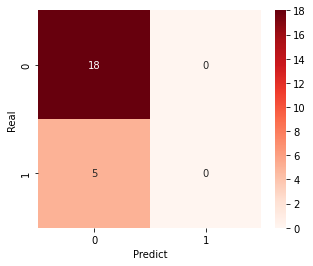

In [138]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [139]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       0.00      0.00      0.00         5

    accuracy                           0.74        23
   macro avg       0.39      0.47      0.42        23
weighted avg       0.60      0.74      0.67        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


73.91304347826086
F-score               precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       0.00      0.00      0.00         5

    accuracy                           0.74        23
   macro avg       0.39      0.47      0.42        23
weighted avg       0.60      0.74      0.67        23



In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))


78.26086956521739
F-score               precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       0.00      0.00      0.00         5

    accuracy                           0.78        23
   macro avg       0.39      0.50      0.44        23
weighted avg       0.61      0.78      0.69        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

# Orange

Convert column test score from actual values into 4 columns by dummies and drop other type columns

In [142]:
Orange_data=dummy_df
Orange_data

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,0,1,1,1,1,1,1,1,0,0,1,0
1,1,0,0,1,1,1,1,1,1,0,0,0
2,1,1,0,1,1,1,1,1,0,0,1,0
3,0,0,0,0,1,1,1,1,1,0,0,0
4,1,0,1,1,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,1,1,1,1,0,1,1,0,1,0,0
110,0,0,0,1,0,0,1,1,0,1,0,0
111,0,0,0,1,0,0,1,1,0,0,1,0
112,1,1,0,1,1,1,1,1,0,1,0,0


In [143]:
Orange_data = Orange_data.drop(["Test_Score_Blue","Test_Score_Gold","Test_Score_Green"],axis=1)



In [144]:
y=Orange_data['Test_Score_Orange'].values
x=Orange_data[Orange_data.columns[:8]].values

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


ML models

In [146]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 
print("F-score",classification_report(y_test, y_pred_tree))



86.95652173913044
F-score               precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.50      0.33      0.40         3

    accuracy                           0.87        23
   macro avg       0.70      0.64      0.66        23
weighted avg       0.85      0.87      0.86        23



In [147]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


69.23076923076923
acc of KNN %  69.56521739130434
F-score               precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.00      0.00      0.00         3

    accuracy                           0.70        23
   macro avg       0.42      0.40      0.41        23
weighted avg       0.73      0.70      0.71        23



In [148]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,1,0
5,0,0
6,0,1
7,0,0
8,1,0
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

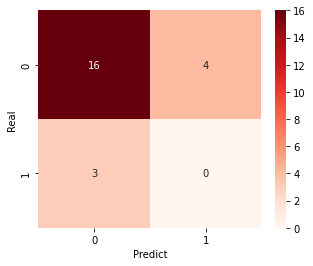

In [149]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [150]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       0.50      0.33      0.40         3

    accuracy                           0.87        23
   macro avg       0.70      0.64      0.66        23
weighted avg       0.85      0.87      0.86        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


78.26086956521739
F-score               precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.00      0.00      0.00         3

    accuracy                           0.78        23
   macro avg       0.43      0.45      0.44        23
weighted avg       0.75      0.78      0.76        23



In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))

86.95652173913044
F-score               precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       0.00      0.00      0.00         3

    accuracy                           0.87        23
   macro avg       0.43      0.50      0.47        23
weighted avg       0.76      0.87      0.81        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

# Blue

In [153]:
Blue_data=dummy_df
Blue_data

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,0,1,1,1,1,1,1,1,0,0,1,0
1,1,0,0,1,1,1,1,1,1,0,0,0
2,1,1,0,1,1,1,1,1,0,0,1,0
3,0,0,0,0,1,1,1,1,1,0,0,0
4,1,0,1,1,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,1,1,1,1,0,1,1,0,1,0,0
110,0,0,0,1,0,0,1,1,0,1,0,0
111,0,0,0,1,0,0,1,1,0,0,1,0
112,1,1,0,1,1,1,1,1,0,1,0,0


 column test score from actual values into 4 columns by dummies and drop other type columns

In [154]:
Blue_data = Blue_data.drop(["Test_Score_Green","Test_Score_Gold","Test_Score_Orange"],axis=1)



In [155]:
y=Blue_data['Test_Score_Blue'].values
x=Blue_data[Blue_data.columns[:8]].values

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


ML models

In [157]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 
print("F-score",classification_report(y_test, y_pred_tree))



39.130434782608695
F-score               precision    recall  f1-score   support

           0       0.45      0.75      0.56        12
           1       0.00      0.00      0.00        11

    accuracy                           0.39        23
   macro avg       0.23      0.38      0.28        23
weighted avg       0.23      0.39      0.29        23



In [158]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


75.82417582417582
acc of KNN %  52.17391304347826
F-score               precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.50      0.45      0.48        11

    accuracy                           0.52        23
   macro avg       0.52      0.52      0.52        23
weighted avg       0.52      0.52      0.52        23



In [159]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,0,1
1,1,0
2,0,1
3,0,1
4,0,0
5,1,1
6,1,0
7,0,0
8,0,1
9,0,0


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

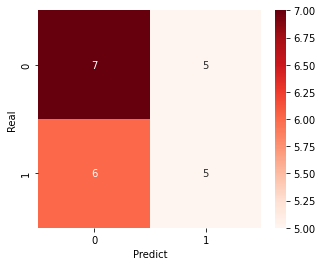

In [160]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [161]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.45      0.75      0.56        12
           1       0.00      0.00      0.00        11

    accuracy                           0.39        23
   macro avg       0.23      0.38      0.28        23
weighted avg       0.23      0.39      0.29        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


39.130434782608695
F-score               precision    recall  f1-score   support

           0       0.45      0.75      0.56        12
           1       0.00      0.00      0.00        11

    accuracy                           0.39        23
   macro avg       0.23      0.38      0.28        23
weighted avg       0.23      0.39      0.29        23



In [163]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))

52.17391304347826
F-score               precision    recall  f1-score   support

           0       0.52      1.00      0.69        12
           1       0.00      0.00      0.00        11

    accuracy                           0.52        23
   macro avg       0.26      0.50      0.34        23
weighted avg       0.27      0.52      0.36        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

# Gold

column test score from actual values into 4 columns by dummies and drop other type columns

In [164]:
Gold_data=dummy_df
Gold_data

,Interface_6,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_17,Test_Score_Blue,Test_Score_Gold,Test_Score_Green,Test_Score_Orange
0,0,1,1,1,1,1,1,1,0,0,1,0
1,1,0,0,1,1,1,1,1,1,0,0,0
2,1,1,0,1,1,1,1,1,0,0,1,0
3,0,0,0,0,1,1,1,1,1,0,0,0
4,1,0,1,1,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
109,1,1,1,1,1,0,1,1,0,1,0,0
110,0,0,0,1,0,0,1,1,0,1,0,0
111,0,0,0,1,0,0,1,1,0,0,1,0
112,1,1,0,1,1,1,1,1,0,1,0,0


In [165]:
Gold_data = Gold_data.drop(["Test_Score_Blue","Test_Score_Green","Test_Score_Orange"],axis=1)



In [166]:
y=Gold_data['Test_Score_Gold'].values
x=Gold_data[Gold_data.columns[:8]].values

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


ML models

In [168]:
tree=DecisionTreeClassifier()
tree_model=tree.fit(x_train, y_train)
y_pred_tree=tree_model.predict(x_test)
print(accuracy_score(y_test, y_pred_tree)*100)

# print("F-score",f1_score(y_test, y_pred_tree)) 
print("F-score",classification_report(y_test, y_pred_tree))



52.17391304347826
F-score               precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.00      0.00      0.00         4

    accuracy                           0.52        23
   macro avg       0.38      0.32      0.34        23
weighted avg       0.62      0.52      0.57        23



In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn_model=knn.fit(x_train, y_train)
print(knn_model.score(x_train,y_train)*100)
y_pred_KNN= knn_model.predict(x_test)
print ("acc of KNN % ",accuracy_score(y_test, y_pred_KNN)*100)
print("F-score",classification_report(y_test, y_pred_KNN))


71.42857142857143
acc of KNN %  73.91304347826086
F-score               precision    recall  f1-score   support

           0       0.81      0.89      0.85        19
           1       0.00      0.00      0.00         4

    accuracy                           0.74        23
   macro avg       0.40      0.45      0.43        23
weighted avg       0.67      0.74      0.70        23



In [170]:
cross_check = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred_KNN})
cross_check

,Actual,Predicted
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,0,1


[Text(0.5, 15.0, 'Predict'), Text(24.0, 0.5, 'Real')]

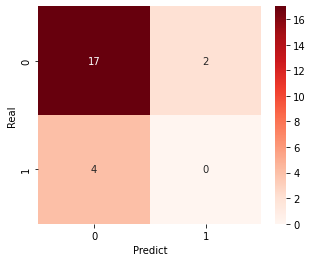

In [171]:
from sklearn.metrics import confusion_matrix

m_c = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(5, 4))
sns.heatmap(m_c, annot=True, cmap="Reds", fmt="d").set(xlabel="Predict", ylabel="Real")

In [172]:
scaler=StandardScaler()
scaler.fit(x_train)
X_scaled=scaler.transform(x_train)
test_scaled=scaler.transform(x_test)
mlpc=MLPClassifier().fit(X_scaled, y_train)
y_pred_networks=mlpc.predict(test_scaled)
accuracy_score(y_test, y_pred_networks)*100
print("F-score",classification_report(y_test, y_pred_networks))


F-score               precision    recall  f1-score   support

           0       0.73      0.58      0.65        19
           1       0.00      0.00      0.00         4

    accuracy                           0.48        23
   macro avg       0.37      0.29      0.32        23
weighted avg       0.61      0.48      0.53        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
regressor =RandomForestClassifier()
model_rf =regressor.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred_rf)*100)
print("F-score",classification_report(y_test, y_pred_rf))


52.17391304347826
F-score               precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.00      0.00      0.00         4

    accuracy                           0.52        23
   macro avg       0.38      0.32      0.34        23
weighted avg       0.62      0.52      0.57        23



In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)
svc=svm.SVC()
model_svc= svc.fit(x_train, y_train)
y_pred_svc= model_svc.predict(x_test)
print(accuracy_score(y_test, y_pred_svc)*100)
print("F-score",classification_report(y_test, y_pred_svc))

82.6086956521739
F-score               precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       0.00      0.00      0.00         4

    accuracy                           0.83        23
   macro avg       0.41      0.50      0.45        23
weighted avg       0.68      0.83      0.75        23



c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier